In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

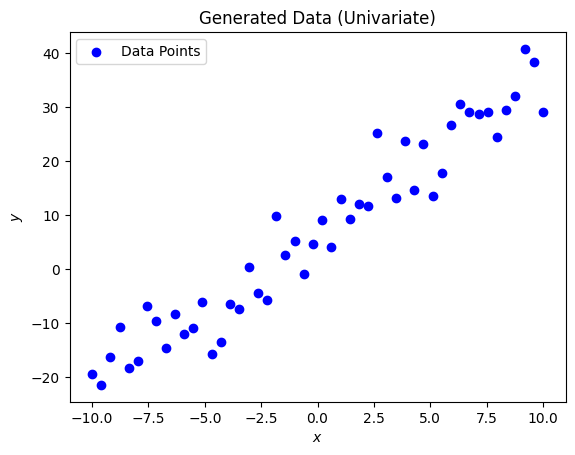

In [ ]:
X, y = generate_data(n=50, noise=5.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [ ]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")

Parameters (w): 
w_1 = 2.86, w_0 = 6.87


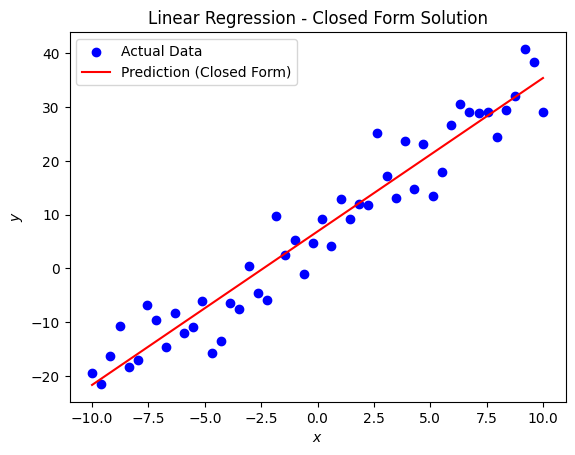

In [ ]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Parameters (w) for Degree 5: [ 5.88112811e+00  3.55957762e+00  3.28108945e-02 -2.15493734e-02
 -6.78082560e-05  1.38175494e-04]


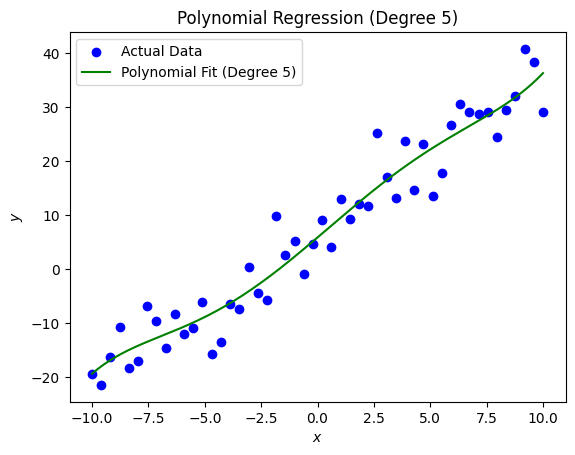

In [ ]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w

m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(X, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = X' * w

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Degree 0: Train RMSE = 17.58, Test RMSE = 16.98


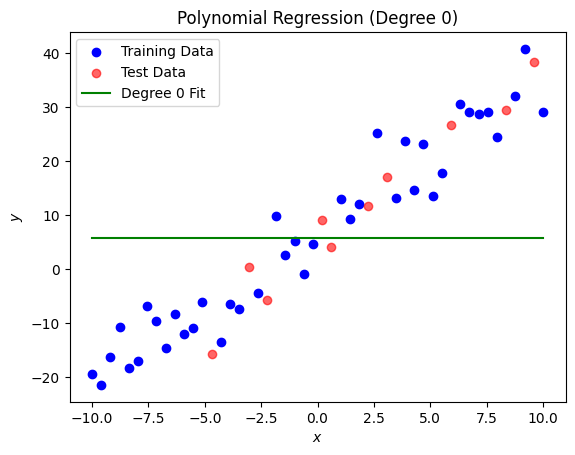

Degree 1: Train RMSE = 4.58, Test RMSE = 4.49


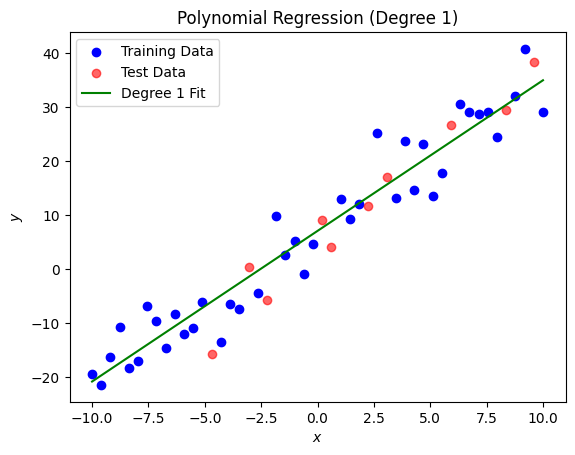

Degree 2: Train RMSE = 4.55, Test RMSE = 4.24


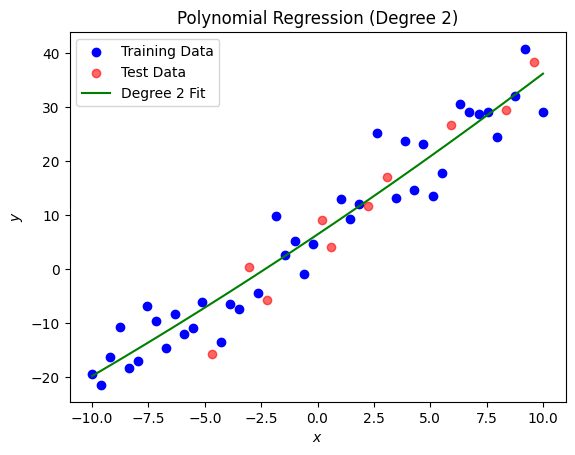

Degree 3: Train RMSE = 4.47, Test RMSE = 4.12


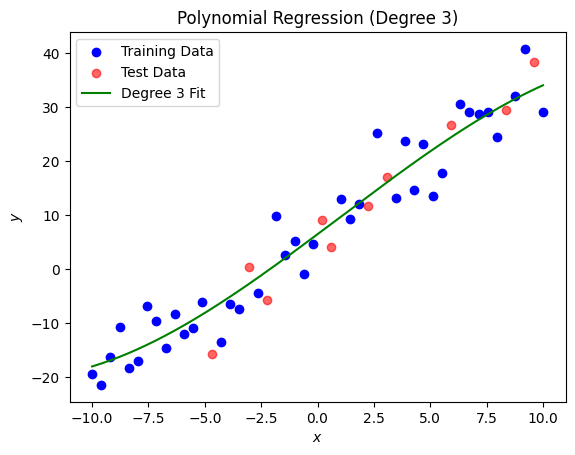

Degree 4: Train RMSE = 4.47, Test RMSE = 4.14


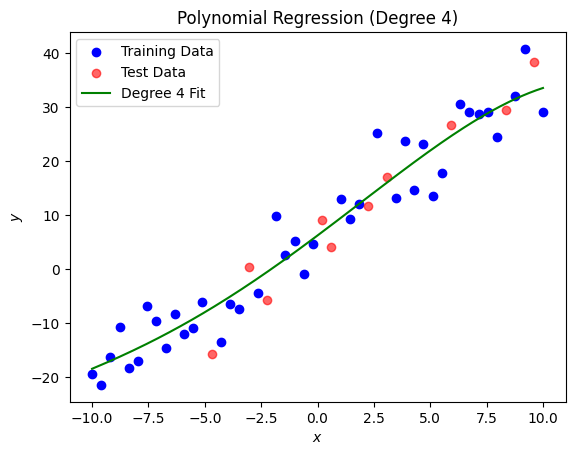

Degree 5: Train RMSE = 4.44, Test RMSE = 4.03


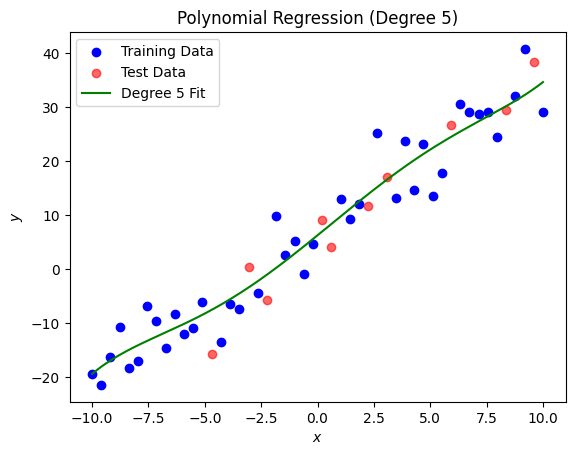

Degree 6: Train RMSE = 4.26, Test RMSE = 4.15


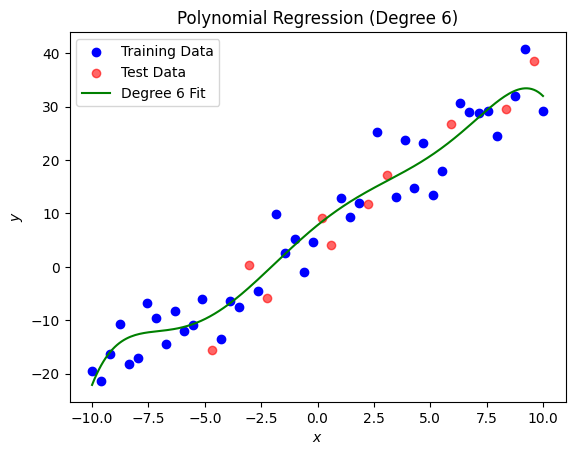

Degree 7: Train RMSE = 4.20, Test RMSE = 4.39


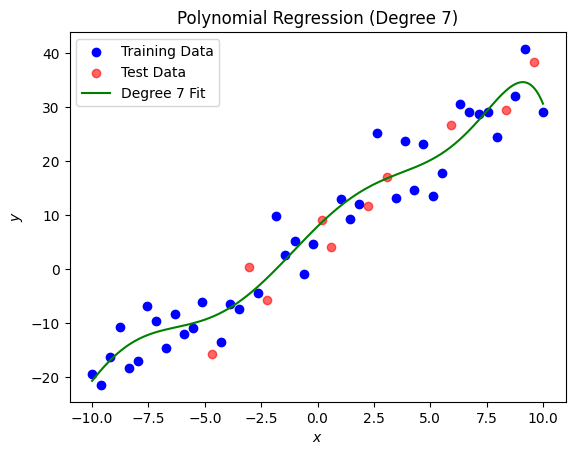

Degree 8: Train RMSE = 4.20, Test RMSE = 4.39


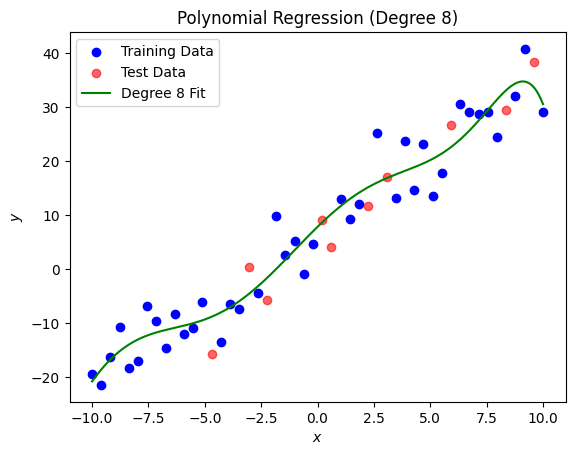

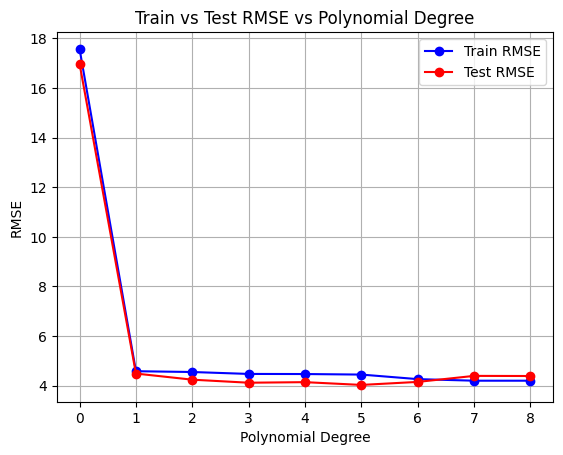

In [ ]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0, 9)
train_rms_errors = []
test_rms_errors = []


for d in degrees:
    # Train the model on the training set
    w_poly = polynomial_regression(X_train, y_train, d)

    # Compute predictions for the training set
    X_train_poly = polynomial_features(X_train, d)
    y_train_pred = X_train_poly.dot(w_poly)

    # Compute predictions for the test set
    X_test_poly = polynomial_features(X_test, d)
    y_test_pred = X_test_poly.dot(w_poly)

    # Calculate RMSE for both training and test sets
    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test, y_test_pred)

    # Store the errors
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

    # Print the RMSE for the current degree
    print(f"Degree {d}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

    # Plot the polynomial fit on the training data
    plt.scatter(X_train, y_train, color='blue', label="Training Data")
    plt.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
    X_fit = np.linspace(X.min(), X.max(), 200)
    X_fit_poly = polynomial_features(X_fit, d)
    y_fit_pred = X_fit_poly.dot(w_poly)
    plt.plot(X_fit, y_fit_pred, label=f"Degree {d} Fit", color='green')
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()

# Plot RMSE for training and test sets
plt.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

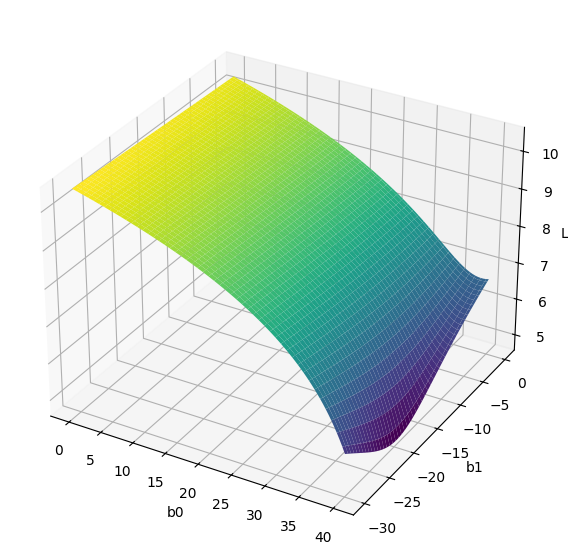

In [ ]:

n = 10000;
x = np.random.normal(3, 5, size=n);
y = 2 * x + 8 + np.random.normal(0, 3, size=n)
X = np.sum(x)
Y = np.sum(y)
b1 = (n * np.dot(x,y) - Y*X)/(n*np.dot(x,x)-X**2)
b0 = (Y-b1*X)/n
b1, b0 = round(b1, 2), round(b0, 2)
def MSE_loss(b0, b1, x, y):
    pred = b0 + b1 * x
    loss = np.sum((pred - y) ** 2) / len(y)
    return loss
b0_vals = np.linspace(0, 40, 100)
b1_vals = np.linspace(-30,0, 100)
Z = np.zeros((len(b0_vals),len(b1_vals)))
for i in range(len(b0_vals)):
    for j in range(len(b1_vals)):
        Z[i, j] = np.log(MSE_loss(b0_vals[i], b1_vals[j], x, y))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
B0, B1 = np.meshgrid(b0_vals, b1_vals)
ax.plot_surface(B0, B1, Z, cmap='viridis')
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('Loss')
plt.show()

8.05 2.0 9.038
0.00019961905736495876


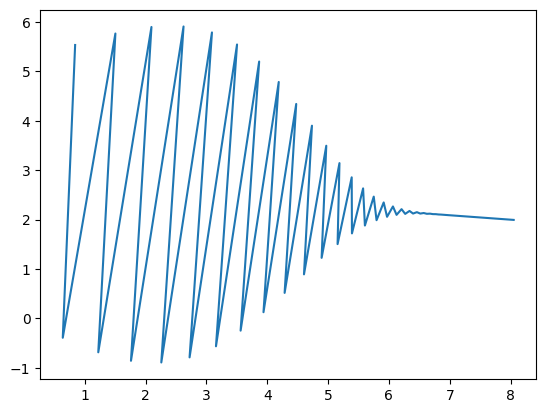

In [ ]:
def gradient(b0, b1, x, y):
    yhat = b0 + b1 * x
    error = (y-yhat)**2
    db0 = - 2 * (y - yhat)
    db1 = - 2 * x * (y - yhat)
    return db0, db1, error

b1 , b0 = 0, 0
alpha = 0.03
b0l, b1l, errl = [],[],[]
for epoch in range(1000):
    Gb0, Gb1, Error = 0, 0, 0
    for i in range(n):
        gb0, gb1,err = gradient(b0, b1, x[i], y[i])
        Gb0, Gb1, Error = Gb0 + gb0, Gb1 + gb1, Error + err
    Gb0, Gb1, Error = Gb0/n, Gb1/n, Error/n
    b0, b1 = b0 - alpha * Gb0, b1 - alpha * Gb1
    alpha = .995 * alpha
    b0l.append(b0)
    b1l.append(b1)
    errl.append(err)
    #print(round(Error,3))
print(round(b0, 2), round(b1, 2), round(Error, 3))
print(alpha)
plt.plot(b0l, b1l)

Iris features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris target: ['setosa' 'versicolor' 'virginica']
Shape of X_train: (120, 4), y_train: (120,)
Shape of X_test: (30, 4), y_test: (30,)
Decision Stump Accuracy: 0.633
Sklearn DT Accuracy: 0.967
Sklearn DT F1-Score: 0.966


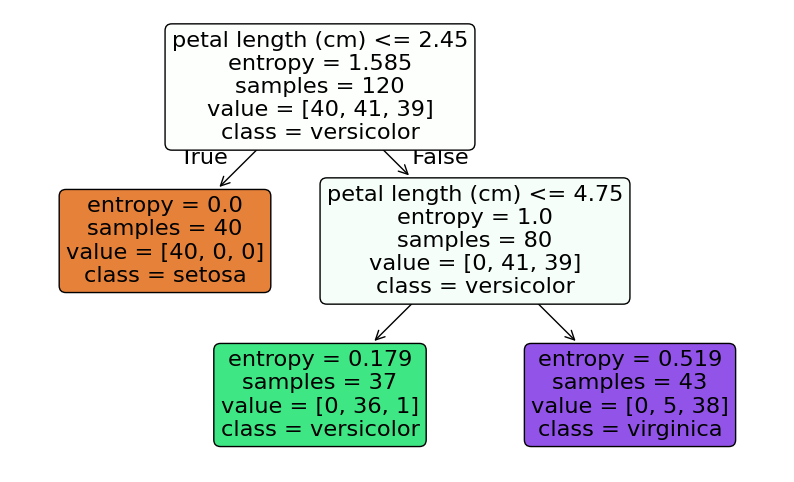

Breast Cancer features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer target: ['malignant' 'benign']


In [4]:
class DecisionStump:
    """
    A decision stump classifier for multi-class classification problems (depth = 1).
    """

    def __init__(self):
        self.feature = None
        self.threshold = None
        self.value_left = None
        self.value_right = None

    def fit(self, X, y):
        """
        Fits a decision stump to the dataset (X, y).
        """
        best_gain = -1
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]
                if len(left_y) and len(right_y):
                    left_weight = len(left_y) / len(y)
                    right_weight = 1 - left_weight
                    gain = self._entropy(y) - (left_weight * self._entropy(left_y) + right_weight * self._entropy(right_y))
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = feature_index
                        self.threshold = threshold
                        self.value_left = np.bincount(left_y).argmax()
                        self.value_right = np.bincount(right_y).argmax()

    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        return np.where(X[:, self.feature] <= self.threshold, self.value_left, self.value_right)

    def _entropy(self, y):
        """
        Computes entropy for a set of labels.
        """
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])
from sklearn.datasets import load_iris

iris = load_iris()

X, y = iris.data, iris.target

print(f"Iris features: {iris.feature_names}")
print(f"Iris target: {iris.target_names}")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.flatten(), test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")
from sklearn.metrics import accuracy_score, f1_score

stump = DecisionStump()
stump.fit(X_train, y_train)

stump_predictions = stump.predict(X_test)

print(f"Decision Stump Accuracy: {accuracy_score(y_test, stump_predictions):.3f}")
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_sklearn = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_sklearn.fit(X_train, y_train)

dt_skl_predictions = dt_sklearn.predict(X_test)

print(f"Sklearn DT Accuracy: {accuracy_score(y_test, dt_skl_predictions):.3f}")
print(f"Sklearn DT F1-Score: {f1_score(y_test, dt_skl_predictions, average='weighted'):.3f}")

plt.figure(figsize=(10,6))
plt.title("Decision Tree Visualization - Sklearn")
plot_tree(dt_sklearn, feature_names=list(iris.feature_names), class_names=list(iris.target_names), filled=True, rounded=True)
plt.show()
from sklearn.utils import resample

class RandomForest:
    """
    A random forest classifier for multi-class classification problems (using decision stumps with depth 1).
    """

    def __init__(self, n_trees=7):
        self.n_trees = n_trees
        self.trees = []

    def fit(self, X, y):
        """
        Fits a random forest to the dataset (X, y).
        """
        self.trees = []
        for _ in range(self.n_trees):
            stump = DecisionStump()
            X_sample, y_sample = self._bootstrap_samples(X, y)
            stump.fit(X_sample, y_sample)
            self.trees.append(stump)

    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        stump_predictions = np.array([stump.predict(X) for stump in self.trees])
        return self._majority_vote(stump_predictions)

    def _bootstrap_samples(self, X, y):
        """
        Applies bootstrap resampling to the dataset.
        """
        return resample(X, y, n_samples=len(X), replace=True)

    def _majority_vote(self, predictions):
        """
        Returns the majority vote of the predictions.
        """
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X, y = breast_cancer.data, breast_cancer.target

print(f"Breast Cancer features: {breast_cancer.feature_names}")
print(f"Breast Cancer target: {breast_cancer.target_names}")